MAPE for Dataset Synthetic: 10.15%
MAPE for Dataset turbine: 8.44%
MAPE for Dataset RealEstate: 24.87%


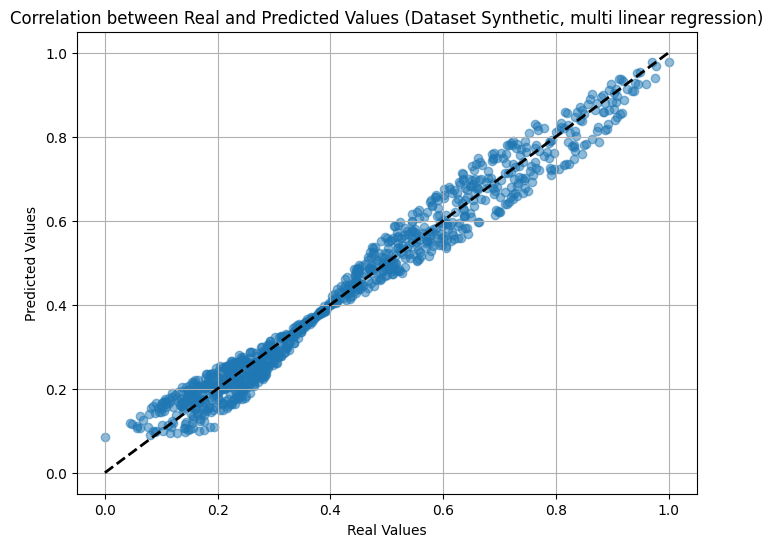

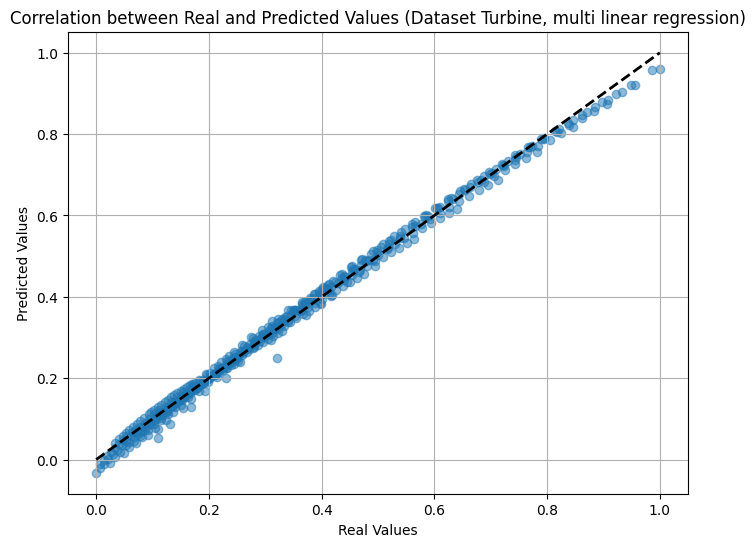

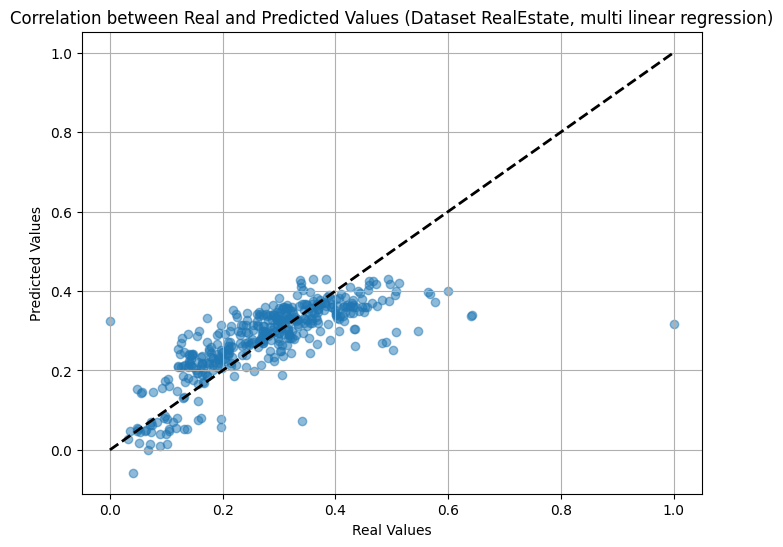

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    epsilon = 1e-10  # A small value to avoid division by zero
    mask = y_true != 0  # Creating a mask to handle zero values in y_true
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred[mask]
    return 100 * np.mean(np.abs((y_true_masked - y_pred_masked) / (y_true_masked + epsilon)))


# Function to train a multilinear regression model on a given dataset
def train_multilinear_regression(dataset, input_columns, output_column):
    X = dataset[input_columns].values
    y = dataset[output_column].values.reshape(-1, 1)

    # Your multilinear regression training code
    from sklearn.linear_model import LinearRegression

    multi_reg_model = LinearRegression()
    multi_reg_model.fit(X, y)

    multi_reg_predictions = multi_reg_model.predict(X)

    return multi_reg_model, multi_reg_predictions
 

# Loading the datasets
dataset1 = pd.read_csv('A1-synthetic.csv')
dataset2 = pd.read_csv('modified_A1-turbine.csv')
dataset3 = pd.read_csv('A1-real_estate.csv')

# Defining input and output columns for dataset 1
input_columns1 = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']
output_column1 = 'z'

# Defining input and output columns for dataset 2
input_columns2 = ['height_over_sea_level', 'fall', 'net', 'fall_1', 'flow']
output_column2 = 'power_of_hydroelectrical_turbine'

# Defining input and output columns for dataset 3
input_columns3 = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
output_column3 = 'Y house price of unit area'

# Training the multilinear regression model for dataset 1
multi_reg_model, multi_reg_predictions1 = train_multilinear_regression(dataset1, input_columns1, output_column1)

# Training the multilinear regression model for dataset 2
multi_reg_model, multi_reg_predictions2 = train_multilinear_regression(dataset2, input_columns2, output_column2)

# Training the multilinear regression model for dataset 3
multi_reg_model, multi_reg_predictions3 = train_multilinear_regression(dataset3, input_columns3, output_column3)

# Predicted values and dataset1 contains the real values
real_values1 = dataset1[output_column1].values.reshape(-1, 1)

# Predicted values and dataset2 contains the real values
real_values2 = dataset2[output_column2].values.reshape(-1, 1)

# Predicted values and dataset3 contains the real values
real_values3 = dataset3[output_column3].values.reshape(-1, 1)

# Calculate MAPE for dataset 1
mape1 = calculate_mape(real_values1, multi_reg_predictions1)
print(f"MAPE for Dataset Synthetic: {mape1:.2f}%")

# Calculate MAPE for dataset 2
mape2 = calculate_mape(real_values2, multi_reg_predictions2)
print(f"MAPE for Dataset turbine: {mape2:.2f}%")

# Calculate MAPE for dataset 3
mape3 = calculate_mape(real_values3, multi_reg_predictions3)
print(f"MAPE for Dataset RealEstate: {mape3:.2f}%")

# Scatter plot for dataset 1
plt.figure(figsize=(8, 6))
plt.scatter(real_values1, multi_reg_predictions1, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Correlation between Real and Predicted Values (Dataset Synthetic, multi linear regression)')
plt.grid(True)
plt.plot([real_values1.min(), real_values1.max()], [real_values1.min(), real_values1.max()], 'k--', lw=2) # diagonal line
plt.savefig('correlation_plot_Synthetic_multi_linear.png')
plt.show()

#Multilinear regression output:
np.savetxt("Synthetic_predictionMultiLinearRegression.csv", multi_reg_predictions1, delimiter=",")

# Scatter plot for dataset 2
plt.figure(figsize=(8, 6))
plt.scatter(real_values2, multi_reg_predictions2, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Correlation between Real and Predicted Values (Dataset Turbine, multi linear regression)')
plt.grid(True)
plt.plot([real_values2.min(), real_values2.max()], [real_values2.min(), real_values2.max()], 'k--', lw=2) # diagonal line
plt.savefig('correlation_plot_Turbine_multi_linear.png')
plt.show()

#Multilinear regression output:
np.savetxt("Turbine_predictionMultiLinearRegression.csv", multi_reg_predictions2, delimiter=",")

# Scatter plot for dataset 3
plt.figure(figsize=(8, 6))
plt.scatter(real_values3, multi_reg_predictions3, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Correlation between Real and Predicted Values (Dataset RealEstate, multi linear regression)')
plt.grid(True)
plt.plot([real_values3.min(), real_values3.max()], [real_values3.min(), real_values3.max()], 'k--', lw=2) # diagonal line
plt.savefig('correlation_plot_RealEstate_multi_linear.png')
plt.show()

#Multilinear regression output:
np.savetxt("RealEstate_predictionMultiLinearRegression.csv", multi_reg_predictions3, delimiter=",")